# Descripción del Proyecto
La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.
Tenemos acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del curso de Análisis estadístico de datos). Para esta tarea de clasificación crearemos un modelo que escoja el plan correcto.
En un proyecto anterior, ya trabajamos con esta información y ya hicimos el paso de procesar los datos, por lo que podemos saltarnos este paso y pasar directamente a la creación de nuestro modelo.

<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Revisión-de-los-datos" data-toc-modified-id="Revisión-de-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Revisión de los datos</a></span></li><li><span><a href="#Creación-de-modelos" data-toc-modified-id="Creación-de-modelos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creación de modelos</a></span><ul class="toc-item"><li><span><a href="#Segmentación-de-datos" data-toc-modified-id="Segmentación-de-datos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Segmentación de datos</a></span></li></ul></li><li><span><a href="#-Comentarios-del-revisor-" data-toc-modified-id="-Comentarios-del-revisor--5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Comentarios del revisor </a></span><ul class="toc-item"><li><span><a href="#Entrenamiento-de-Arboles-de-decisión-(DecisionTreeClassifier)" data-toc-modified-id="Entrenamiento-de-Arboles-de-decisión-(DecisionTreeClassifier)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Entrenamiento de Arboles de decisión (DecisionTreeClassifier)</a></span></li><li><span><a href="#Entrenamiento-de-bosques-aleatorios-(RandomForestClassifier)" data-toc-modified-id="Entrenamiento-de-bosques-aleatorios-(RandomForestClassifier)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Entrenamiento de bosques aleatorios (RandomForestClassifier)</a></span></li><li><span><a href="#Modelo-de-Regresión-Logistica" data-toc-modified-id="Modelo-de-Regresión-Logistica-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Modelo de Regresión Logistica</a></span></li></ul></li><li><span><a href="#-Comentarios-del-revisor-" data-toc-modified-id="-Comentarios-del-revisor--6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Comentarios del revisor </a></span></li><li><span><a href="#Calidad-de-los-distintos-modelos" data-toc-modified-id="Calidad-de-los-distintos-modelos-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calidad de los distintos modelos</a></span></li><li><span><a href="#-Comentarios-del-revisor-" data-toc-modified-id="-Comentarios-del-revisor--8"><span class="toc-item-num">8&nbsp;&nbsp;</span> Comentarios del revisor </a></span></li><li><span><a href="#Probando-nuestro-modelo" data-toc-modified-id="Probando-nuestro-modelo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Probando nuestro modelo</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusión</a></span></li><li><span><a href="#-Comentarios-del-revisor-" data-toc-modified-id="-Comentarios-del-revisor--11"><span class="toc-item-num">11&nbsp;&nbsp;</span> Comentarios del revisor </a></span></li></ul></div>

## Inicialización

In [1]:
# Cargamos todas las librerías a usar
import pandas as pd
from IPython.display import display, HTML, Image
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [2]:
#Definimos una función Print que sea vizualmente mas amigable
def print_mejorado(texto,size):
    size=str(size)
    display(HTML('<span style="font-size: '+size+'px;">'+texto+'</span>'))  

## Cargar los datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
data=pd.read_csv('/datasets/users_behavior.csv')

## Revisión de los datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Imprimimos una muestra pequeña de nuestros datos
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Como ya se mencionó en la instroducción, dado que ya trabajamos con estos datos en un proyecto anterior, tenemos la constancia que los datos estan procesados correctamente. Por lo que pasaremos directamente a la creación de nuestro modelo.

## Creación de modelos

Disponemos de un DataFrame con información del comportamiento del los usuarios que eligieron el plan Smart o Ultra.
Por tanto, estamos ante una tarea de **clasificación**, es decir, nuestro modelo deberá ser capaz de predecir que plan elegira el usuario tomando algunas caracteristicas de entrada (numero de llamadas, minutos, mensajes, mb).
En este caso, la columna objetivo (target) es `is_ultra`,donde 1 es usuario con plan Ultra y 0 usuario con plan Smart, mientras que el resto de las columnas coresponden a las caracteristicas (features) que determinan esta decisión.

In [6]:
features =  data.drop(['is_ultra'], axis=1)  #características
target =  data['is_ultra']  #objetivo

### Segmentación de datos

Para realizar el entranamiento de nuestro modelo predictivo, separaré los datos fuentes (features y target) en un 60% para el entrenamiento, un 20% para la validación y 20% para la prueba segun la imagen mostrada a continuación.

In [7]:
display(Image(url='https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_7/ES/moved_7.4.2.2ES.png'))

In [8]:
#Segmentamos los datos en un 60% para entrenamiento y un 40& para pruebas (por ahora)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

#Segmentamos los datos de prueba a la mitad, de esta forma obtenemos un 20% de validacion y un 20% de pruebas
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)

In [9]:
print_mejorado(f'Longitud de features y target original: {len(features)} y {len(target)}',20)
print(f'Longitud de features y target de entrenamiento: {len(features_train)} y {len(target_train)}')
print(f'Longitud de features y target de validacion: {len(features_valid)} y {len(target_valid)}')
print(f'Longitud de features y target de prueba: {len(features_test)} y {len(target_test)}')

Longitud de features y target de entrenamiento: 1928 y 1928
Longitud de features y target de validacion: 643 y 643
Longitud de features y target de prueba: 643 y 643


De esta forma tenemos:  
Set de entrenamiento (`features_train`,`target_train`) 60% del DataFrame original  
Set de validación (`features_valid`,`target_valid`) 20% del DataFrame original  
Set de prueba (`features_test`,`target_test`) 20% del DataFrame original  

### Entrenamiento de Arboles de decisión (DecisionTreeClassifier)

A continuación crearemos Arboles de decisión de distinta profundidad y elegiremos el modelo que obtenga la mejor precisión.

In [10]:
#Creamos 10 arboles de profundidad 1 a profundidad 10
for i in range(1,10):
    #entrenamos el modelo
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(features_train, target_train)
    
    #Aplicamos nuestro modelo al conjunto de validación
    predictions_valid = model.predict(features_valid)
    
    #Calculamos la exactitud comparando las predicciones de nuestro modelo con los datos esperados
    result = accuracy_score(target_valid, predictions_valid)
    
    #Imprimimos la exactitud del modelo
    print(f'Exactitud del arbol con profundidad de = {i} : {result}')

Exactitud del arbol con profundidad de = 1 : 0.7542768273716952
Exactitud del arbol con profundidad de = 2 : 0.7822706065318819
Exactitud del arbol con profundidad de = 3 : 0.7853810264385692
Exactitud del arbol con profundidad de = 4 : 0.7791601866251944
Exactitud del arbol con profundidad de = 5 : 0.7791601866251944
Exactitud del arbol con profundidad de = 6 : 0.7838258164852255
Exactitud del arbol con profundidad de = 7 : 0.7822706065318819
Exactitud del arbol con profundidad de = 8 : 0.7791601866251944
Exactitud del arbol con profundidad de = 9 : 0.7822706065318819


De lo anterior, tenemos que el mejor modelo usando Arboles de decisión se obtiene con una **profundidad 3 y este tiene una exactitud del 78,5%.**

In [11]:
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=3)

### Entrenamiento de bosques aleatorios (RandomForestClassifier)

A continuación entrenaremos varios modelos de bosques aleatorios, este modelo entrena una gran cantidad de árboles independientes y toma una decisión mediante el voto de cada uno. Entrenaré varios modelos variando la cantidad de arboles, variando la cantidad desde 1 hasta 50 y elegiremos el que mejor desempeño tenga.

In [12]:
best_score = 0
best_est = 0
for est in range(1, 50): # selecciona el rango del hiperparámetro
    #configuramos el número de árboles (n-estimators)
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    
    #entrenamos el modelo en el conjunto de entrenamiento
    model.fit(features_train,target_train)
    
    #Evaluamos la precisión del modelo usando el conjunto de validación
    score = model.score(features_valid,target_valid)
    print(f'Precisión con {est} n_estimators: {score}')
    if score > best_score:
        best_score = score# guarda la mejor puntuación de accuracy en el conjunto de validación
        best_est = est# guarda el número de estimadores que corresponden a la mejor puntuación de accuracy
        
print("Precisión del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))    

Precisión con 1 n_estimators: 0.7107309486780715
Precisión con 2 n_estimators: 0.7636080870917574
Precisión con 3 n_estimators: 0.7387247278382582
Precisión con 4 n_estimators: 0.7713841368584758
Precisión con 5 n_estimators: 0.749611197511664
Precisión con 6 n_estimators: 0.7807153965785381
Precisión con 7 n_estimators: 0.7682737169517885
Precisión con 8 n_estimators: 0.7822706065318819
Precisión con 9 n_estimators: 0.7729393468118196
Precisión con 10 n_estimators: 0.7853810264385692
Precisión con 11 n_estimators: 0.7838258164852255
Precisión con 12 n_estimators: 0.7869362363919129
Precisión con 13 n_estimators: 0.7822706065318819
Precisión con 14 n_estimators: 0.7838258164852255
Precisión con 15 n_estimators: 0.7838258164852255
Precisión con 16 n_estimators: 0.7869362363919129
Precisión con 17 n_estimators: 0.7869362363919129
Precisión con 18 n_estimators: 0.7931570762052877
Precisión con 19 n_estimators: 0.7884914463452566
Precisión con 20 n_estimators: 0.7869362363919129
Precisión 

De lo anterior, tenemos que el mejor modelo usando Bosques aleatorios se obtiene con **23 arboles (n_estimators) y este tiene una exactitud del 79,5%.**

In [13]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=23)

### Modelo de Regresión Logistica

In [14]:
#inicializamos el constructor de regresión logística 
model = LogisticRegression(random_state=12345, solver='liblinear')

#entrenamos el modelo en el conjunto de entrenamiento
model.fit(features_train,target_train) 

#Evaluamos la precisión del modelo
score_valid = model.score(features_valid,target_valid) # calcula la puntuación de accuracy en el conjunto de validación

print("Accuracy del modelo de regresión logística en el conjunto de validación:", score_valid)

Accuracy del modelo de regresión logística en el conjunto de validación: 0.7589424572317263


De lo anterior, tenemos **el modelo de Regresión logistica tiene una exactitud del 75,9%.**

In [15]:
model_regresion = LogisticRegression(random_state=12345, solver='liblinear')

## Calidad de los distintos modelos

Dado que ya tenemos los mejores hiperparametros para los 3 modelos vistos anteriormente, podemos prescindir de nuestros datos de validación. A continuación fusionaré los datos de entrenamiento originales con los datos de validación para formar un nuevo conjunto de datos de entrenamiento el cual usaré para entrenar cada uno de los 3 modelos y evaluar su desempeño usando el conjunto de prueba definido anteriormente.

In [16]:
#features_train2=features_train+features_valid
#target_train2=target_train+target_valid
features_train2 = pd.concat([features_train, features_valid], axis=0)
target_train2 = pd.concat([target_train, target_valid], axis=0)

print(f'Longitud de nuevo set de entrenamiento(caracteristicas): {len(features_train2)}')
print(f'Longitud de nuevo set de entrenamiento(objetivos): {len(target_train2)}')

Longitud de nuevo set de entrenamiento(caracteristicas): 2571
Longitud de nuevo set de entrenamiento(objetivos): 2571


In [17]:
#Entrenamos los 3 modelos con nuestros nuevo set de entrenamiento
model_tree.fit(features_train2,target_train2)
model_forest.fit(features_train2,target_train2)
model_regresion.fit(features_train2,target_train2) 

LogisticRegression(random_state=12345, solver='liblinear')

Finalmente, calcularemos la precisión del cada uno de estos modelos usando tanto los datos de prueba que apartamos al comienzo como los datos de entrenamiento para evaluar el sobreajuste (overfiting) de cada uno de los modelos.

In [18]:
#Evaluamos la precisión del modelo de arbol de decisión usando el conjunto de prueba y de entrenamiento
predictions_test = model_tree.predict(features_test)
precision_tree = accuracy_score(target_test, predictions_test)
print(f'La precisión del modelo de arbol de decisión con los datos de prueba fue del {precision_tree*100:.1f}%')

predictions_test = model_tree.predict(features_train2)
precision_tree = accuracy_score(target_train2, predictions_test)
print(f'La precisión del modelo de arbol de decisión con los datos de entrenamiento fue del {precision_tree*100:.1f}%')  

La precisión del modelo de arbol de decisión con los datos de prueba fue del 77.6%
La precisión del modelo de arbol de decisión con los datos de entrenamiento fue del 80.3%


El modelo de arbol de decisión muestra un **leve sobreajuste** cuando se utiliza con el dataset de entrenamiento.

In [19]:
#Evaluamos la precisión del modelo de bosques aleatorios usando el conjunto de prueba y de entrenamiento
predictions_test = model_forest.predict(features_test)
precision_forest = accuracy_score(target_test, predictions_test)
print(f'La precisión del modelo bosques aleatorios con los datos de prueba fue del {precision_forest*100:.1f}%')

predictions_test = model_forest.predict(features_train2)
precision_forest = accuracy_score(target_train2, predictions_test)
print(f'La precisión del modelo bosques aleatorios con los datos de entrenamiento fue del {precision_forest*100:.1f}%') 

La precisión del modelo bosques aleatorios con los datos de prueba fue del 80.6%
La precisión del modelo bosques aleatorios con los datos de entrenamiento fue del 99.6%


El modelo de bosques aleatorios muestra un **excesivo sobreajuste** cuando se utiliza con el dataset de entrenamiento.

In [20]:
#Evaluamos la precisión del modelo de regresión logistica usando el conjunto de prueba y de entrenamiento
predictions_test = model_regresion.predict(features_test)
precision_regresion = accuracy_score(target_test, predictions_test)
print(f'La precisión del modelo de regresión logistica con los datos de prueba fue del {precision_regresion*100:.1f}%')

predictions_test = model_regresion.predict(features_train2)
precision_regresion = accuracy_score(target_train2, predictions_test)
print(f'La precisión del modelo de regresión logistica con los datos de entrenamiento fue del {precision_regresion*100:.1f}%') 

La precisión del modelo de regresión logistica con los datos de prueba fue del 73.6%
La precisión del modelo de regresión logistica con los datos de entrenamiento fue del 75.0%


El modelo de arbol de decisión muestra un **leve sobreajuste** cuando se utiliza con el dataset de entrenamiento.

A primera vista, el modelo de bosques aleatorios parecía ser la mejor opción ya que de los tres es el mas preciso. Sin embargo, tras analizar el desempeño de este modelo utilizando los datos de entrenamiento, vemos que tiene un sobreajuste (overfitting) excesivo, es decir, aprendio "demasiado bien", memorizando practicamente todos los resultados del conjunto de entrenamiento. Esto no es bueno ya que el modelo no puede generalizar bien a datos no vistos previamente, lo que significa que su rendimiento será pobre en la práctica cuando se le presente información nueva.  

Con respecto a los otros dos modelos solo mostraron un leve sobreajuste. **Es por esto que finalmente decidiré quedarme con el modelo de arbol de decisión de profundidad 3, con una precisión del 77,6%, además de ser el mas simple de los 3.**

## Probando nuestro modelo

A continuación crearé un función que llame al modelo entrenado y que sea capaz de determinar que modelo elegiría el usuario considerando como datos de entrada los numeros de llamada, minutos, mensajes y mb utilizados por mes para poder realizar una recomendación exitosa.

In [21]:
def modelo_arbol(num_llamadas,minutos,num_mensajes,mb):
    datos = {'calls': [num_llamadas],'minutes': [minutos],'messages': [num_mensajes],'mb_used':[mb]}
    datos = pd.DataFrame(datos)
    
    prediccion = model_tree.predict(datos)
    
    if prediccion[0] == 0:
        print_mejorado('El usuario probablemente elegirá del modelo Smart',24)
    elif  prediccion[0] == 1:
        print_mejorado('El usuario probablemente elegirá del modelo Ultra',24)
    else:
        print('Error')

Una vez creada la función, probaré la función con algun datos y veré que tan coherentes son las respuestas.

In [22]:
numero_llamadas= 10
minutos=60
mensajes=10
mb_usados=10

modelo_arbol(numero_llamadas,minutos,mensajes,mb_usados)

In [23]:
numero_llamadas= 100
minutos=60
mensajes=10
mb_usados=10

modelo_arbol(numero_llamadas,minutos,mensajes,mb_usados)

In [24]:
numero_llamadas= 100
minutos=6000
mensajes=10
mb_usados=10

modelo_arbol(numero_llamadas,minutos,mensajes,mb_usados)

In [25]:
numero_llamadas= 100
minutos=60
mensajes=10
mb_usados=9000

modelo_arbol(numero_llamadas,minutos,mensajes,mb_usados)

In [26]:
numero_llamadas= 100
minutos=600
mensajes=9000
mb_usados=10

modelo_arbol(numero_llamadas,minutos,mensajes,mb_usados)

In [27]:
numero_llamadas= 1
minutos=500
mensajes=0
mb_usados=0

modelo_arbol(numero_llamadas,minutos,mensajes,mb_usados)

In [28]:
numero_llamadas= 1
minutos=5000
mensajes=0
mb_usados=0

modelo_arbol(numero_llamadas,minutos,mensajes,mb_usados)

En base a lo anterior y en base a mi criterio subjetivo, me parecen coherentes las predicciones de nuestro modelo, en donde, si el usuario muestra un bajo consumo, se recomienda en plan mas economico (Smart), pero mientras mas aumentan los consumos, tiende a recomendar el plan "Ultra".

In [29]:
def modelo_arbol2(num_llamadas,minutos,num_mensajes,mb):
    datos = {'calls': [num_llamadas],'minutes': [minutos],'messages': [num_mensajes],'mb_used':[mb]}
    datos = pd.DataFrame(datos)
    prediccion = model_tree.predict(datos)
    return prediccion[0]  
    

<AxesSubplot:xlabel='Minutos Hablados', ylabel='Plan'>

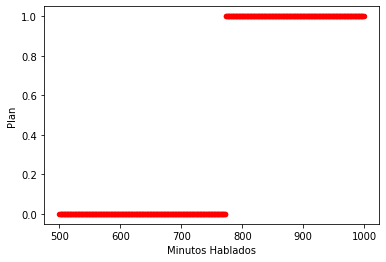

In [30]:
test = pd.DataFrame(columns=['Minutos Hablados', 'Plan'])
for i in range(500,1000):
    nueva_fila = {'Minutos Hablados': i, 'Plan': modelo_arbol2(1,i,0,0)}
    test = test.append(nueva_fila, ignore_index=True)
test.plot(x='Minutos Hablados', y='Plan', kind='scatter', style='-', color='red')

<AxesSubplot:xlabel='Mensajes', ylabel='Plan'>

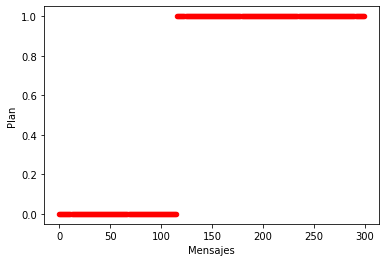

In [31]:
test = pd.DataFrame(columns=['Mensajes', 'Plan'])
for i in range(0,300):
    nueva_fila = {'Mensajes': i, 'Plan': modelo_arbol2(0,0,i,0)}
    test = test.append(nueva_fila, ignore_index=True)
test.plot(x='Mensajes', y='Plan', kind='scatter', style='-', color='red')

<AxesSubplot:xlabel='MB', ylabel='Plan'>

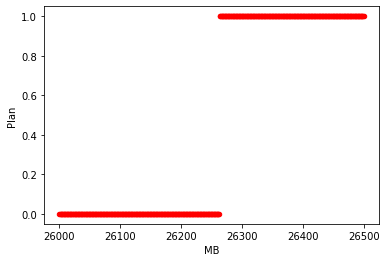

In [32]:
test = pd.DataFrame(columns=['MB', 'Plan'])
for i in range(26000,26500):
    nueva_fila = {'MB': i, 'Plan': modelo_arbol2(0,0,0,i)}
    test = test.append(nueva_fila, ignore_index=True)
test.plot(x='MB', y='Plan', kind='scatter', style='-', color='red')

Finalmente y solo por curiosidad, decidí probar las caracteristicas de minutos, número de mensajes y mb mensuales de forma independiente. Considerando, para cada caso, que durante el mes solo se consumio una de estas caracteristicas, los resultados fueron que nuestro modelo:

-Recomienda el plan Ultra sobre los 780 minutos mensuales app (el usuario solo hizo una llamada de esta duración)  
-Recomienda el plan Ultra sobre los 120 mensajes mensuales app (el usuario solo envio mensajes)  
-Recomienda el plan Ultra sobre los 26280 MB mensuales (el usuario solo consumio datos)  

## Conclusión

De los 3 modelos entrenados, finalmente **el modelo de arbol de decision de profundidad 3 con una seed=12345 es el que mejor cumple los requerimientos de la empresa, siendo capaz de recomendar un plan para un nuevo usuario con un 77,6% de certeza.**  

Tambien vimos que un modelo, por muy preciso que aparente ser, como lo fue el caso de bosques aleatorios, puede no ser siempre el adecuado ya que esta precisión puede venir acompañada de un sobreajuste, el cual limita la capacidad del modelo de generalizar y de responder adecuadamente a información nueva que se aleje de los datos del dataset de entrenamiento.